In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import seaborn as sns
sns.set()
import torch.nn as nn
import torch
import torch.nn.functional as F
import torch.optim as optim

In [24]:
df = pd.read_csv('../clasificadores/titanic2.csv')

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age'>

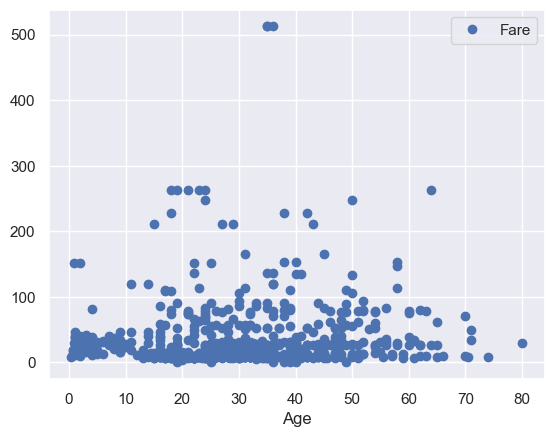

In [26]:
df.plot(x="Age",y="Fare",style="o")

In [27]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:

df['Age'].fillna( method='bfill',inplace=True)
df['Embarked'].fillna( method='bfill',inplace=True)

C:\Users\RPFC\AppData\Local\Temp\ipykernel_24528\2438070155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna( method='bfill',inplace=True)
C:\Users\RPFC\AppData\Local\Temp\ipykernel_24528\2438070155.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'].fillna( method='bfill',inplace=True)
C:\Users\RPFC\AppData\Local\Temp\ipykernel_24528\2438070155.py:2: FutureWarning: A value is trying to be set on a copy of a D

In [29]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [30]:
x=df.drop(["Cabin","Survived","Name","Ticket"],axis=1)

In [31]:
x.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [32]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S
887,888,1,female,19.0,0,0,30.0000,S
888,889,3,female,26.0,1,2,23.4500,S
889,890,1,male,26.0,0,0,30.0000,C


In [33]:
dummies= pd.get_dummies(x[['Sex','Embarked']],drop_first=True)

In [34]:
dummies

,Sex_male,Embarked_Q,Embarked_S
0,True,False,True
1,False,False,False
2,False,False,True
3,False,False,True
4,True,False,True
...,...,...,...
886,True,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [35]:
cat= pd.concat([x,dummies],axis=1)

In [36]:
cat

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,3,male,22.0,1,0,7.2500,S,True,False,True
1,2,1,female,38.0,1,0,71.2833,C,False,False,False
2,3,3,female,26.0,0,0,7.9250,S,False,False,True
3,4,1,female,35.0,1,0,53.1000,S,False,False,True
4,5,3,male,35.0,0,0,8.0500,S,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S,True,False,True
887,888,1,female,19.0,0,0,30.0000,S,False,False,True
888,889,3,female,26.0,1,2,23.4500,S,False,False,True
889,890,1,male,26.0,0,0,30.0000,C,True,False,False


In [37]:
x=cat.drop(["Sex",'Embarked'],axis=1)

In [38]:
y=df["Survived"]

In [39]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [40]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,True,False,True
887,888,1,19.0,0,0,30.0000,False,False,True
888,889,3,26.0,1,2,23.4500,False,False,True
889,890,1,26.0,0,0,30.0000,True,False,False


In [41]:
sscaler = StandardScaler()
sscaler.fit(x)
X_std= sscaler.transform(x)

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3,random_state=99)
X_train.shape

(623, 9)

In [43]:
y_train

557    0
289    1
718    0
822    0
759    1
      ..
713    0
168    0
185    0
35     0
641    1
Name: Survived, Length: 623, dtype: int64

In [44]:
y_test

247    1
823    1
566    0
666    0
199    0
      ..
610    0
819    0
552    0
481    0
580    1
Name: Survived, Length: 268, dtype: int64

In [91]:
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.layer1=nn.Linear(X_train.shape[1],64)
    self.layer2=nn.Linear(64,32)
    self.layer3=nn.Linear(32,1)
  def forward(self,x):
    x=F.relu(self.layer1(x))
    x=F.sigmoid(self.layer2(x))
    x=self.layer3(x)
    return x
model = NN()
print(model)

NN(
  (layer1): Linear(in_features=9, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
)


In [92]:
x=torch.tensor(np.array(X_train),dtype=torch.float32,requires_grad=True)
y=torch.tensor(np.array(y_train).reshape(-1,1),dtype=torch.float32)


In [93]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [94]:
loss_fn=nn.MSELoss()

In [95]:
epochs=200
for i in range(epochs):
  #initialize the model parameter
  optimizer.zero_grad(set_to_none=True)
  #calculate the loss
  output=model(x)
  loss=loss_fn(output,y)
  #backpropagation
  loss.backward()
  #update the parameters
  optimizer.step()
  if(i%5==0):
    print(f"epochs: {i}......loss:{loss}")

epochs: 0......loss:0.41396963596343994
epochs: 5......loss:0.3103141188621521
epochs: 10......loss:0.25096866488456726
epochs: 15......loss:0.22672687470912933
epochs: 20......loss:0.2184368371963501
epochs: 25......loss:0.2104209065437317
epochs: 30......loss:0.19873972237110138
epochs: 35......loss:0.1867152601480484
epochs: 40......loss:0.1769760698080063
epochs: 45......loss:0.16910971701145172
epochs: 50......loss:0.16185329854488373
epochs: 55......loss:0.15502507984638214
epochs: 60......loss:0.14915309846401215
epochs: 65......loss:0.14440202713012695
epochs: 70......loss:0.1405576467514038
epochs: 75......loss:0.13743683695793152
epochs: 80......loss:0.1349794864654541
epochs: 85......loss:0.133064866065979
epochs: 90......loss:0.1315164864063263
epochs: 95......loss:0.13025043904781342
epochs: 100......loss:0.12918807566165924
epochs: 105......loss:0.12826108932495117
epochs: 110......loss:0.12742522358894348
epochs: 115......loss:0.12666839361190796
epochs: 120......loss:0.

In [96]:
y_train_pred = model(torch.tensor(X_train,dtype=torch.float32,requires_grad=True))
y_test_pred = model(torch.tensor(X_test,dtype=torch.float32))

#convert to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

In [97]:
y_train_pred

array([[ 2.84485996e-01],
       [ 8.30798864e-01],
       [ 3.66883650e-02],
       [ 3.45343620e-01],
       [ 1.00097644e+00],
       [ 3.67883027e-01],
       [ 8.50554630e-02],
       [ 4.29773211e-01],
       [ 2.36413181e-01],
       [ 9.21310410e-02],
       [ 7.17530027e-02],
       [ 2.64971331e-02],
       [ 2.64027059e-01],
       [ 4.15097699e-02],
       [ 3.89882028e-01],
       [ 5.08772507e-02],
       [ 4.65335608e-01],
       [ 3.81336242e-01],
       [ 2.68196344e-01],
       [ 1.04106653e+00],
       [ 1.74908102e-01],
       [ 2.48479068e-01],
       [ 5.12733221e-01],
       [ 1.27686113e-01],
       [ 3.36584538e-01],
       [ 1.05623519e+00],
       [ 8.44006911e-02],
       [ 3.16909432e-01],
       [ 8.34369659e-01],
       [ 3.00348580e-01],
       [ 1.03559530e+00],
       [ 9.35845152e-02],
       [ 8.11465755e-02],
       [ 4.05750573e-01],
       [-9.63085294e-02],
       [ 7.36883283e-01],
       [ 5.35164103e-02],
       [ 2.97686607e-01],
       [ 1.2

In [98]:
y_test_pred

array([[ 0.80249345],
       [ 0.59236526],
       [ 0.132007  ],
       [ 0.17645359],
       [ 0.82424057],
       [ 0.07944611],
       [ 0.32991204],
       [ 1.014141  ],
       [ 0.01434115],
       [ 0.99417555],
       [ 0.83896244],
       [ 0.17279285],
       [ 0.6679535 ],
       [ 0.76205873],
       [ 0.14741641],
       [ 0.9600173 ],
       [ 0.36638236],
       [ 0.81539774],
       [ 0.08520784],
       [ 0.5353655 ],
       [-0.01842472],
       [ 0.7873375 ],
       [ 0.03224839],
       [ 0.1648038 ],
       [ 0.4633655 ],
       [ 0.599663  ],
       [ 0.03781334],
       [ 0.05163757],
       [ 0.9175874 ],
       [ 0.9139153 ],
       [ 0.7554475 ],
       [ 0.10255849],
       [ 0.7516314 ],
       [ 0.980162  ],
       [ 0.09856642],
       [ 0.76803684],
       [ 0.4850393 ],
       [-0.01923521],
       [ 0.04458035],
       [ 0.1337673 ],
       [ 0.01796365],
       [ 1.0724458 ],
       [ 0.09571106],
       [ 0.9637631 ],
       [-0.02355591],
       [ 0

In [99]:
def predict_fn(x):
    if x > 0.5: 
        return 1
    return 0
vectorized_func = np.vectorize(predict_fn)

In [100]:
y_train_pred = vectorized_func(y_test_pred)
y_train_pred

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [101]:

y_test_pred  = vectorized_func(y_test_pred)
y_test_pred

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [106]:
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Exactitud del modelo: {accuracy}")
print(f"Matriz de confusión:\n{conf_matrix}")

Exactitud del modelo: 0.7798507462686567
Matriz de confusión:
[[148  26]
 [ 33  61]]


Matriz de confusión:
[[148  26]
 [ 33  61]]


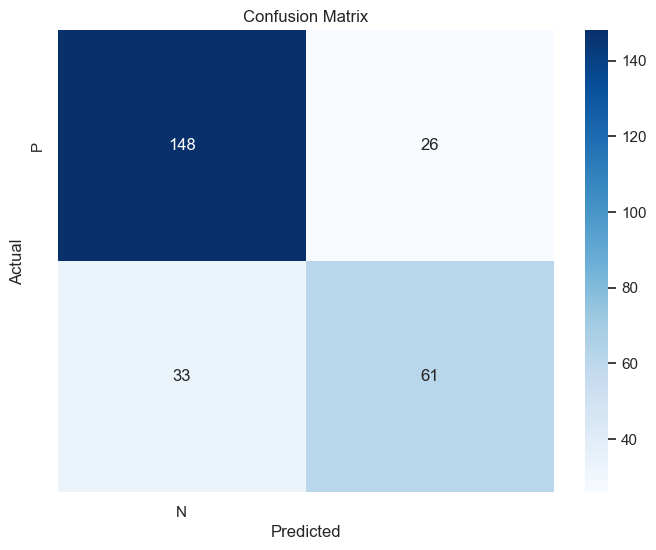

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix


# Construir la matriz de confusión
confusion = confusion_matrix(y_test, y_test_pred)
# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels='N', yticklabels='P')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()